In [1]:
#Importing basic libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset and checking the first 5 rows-->

df=pd.read_excel('1688639662_ausapparalsales4thqrt2020 (1).xlsx')
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [3]:
#Checking for the dtypes & null values-->

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [4]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


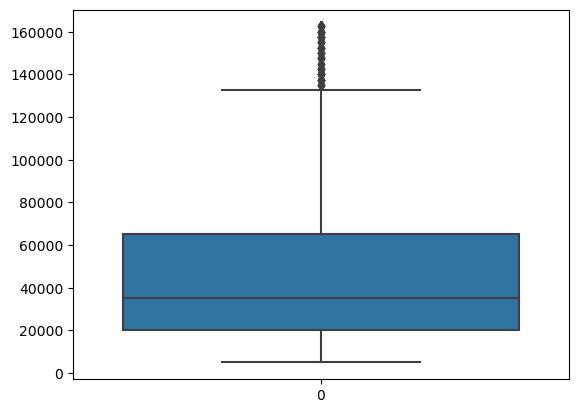

In [5]:
#Checking for the Outliers in our Data-->

sns.boxplot(df['Sales'])
plt.show()

In [6]:
#There are few outliers in our data, Removing those outliers-->

df['Sales']=df['Sales'].drop(df[df['Sales']>133000].index)

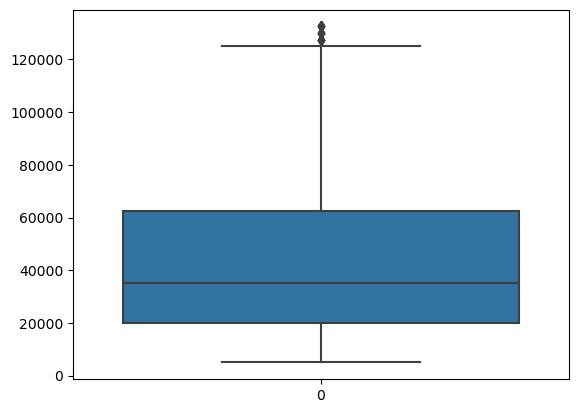

In [7]:
sns.boxplot(df['Sales'])
plt.show()

# Data Analysis-->

### Q1) Determine which group is generating the highest sales, and which group is generating the lowest sales-

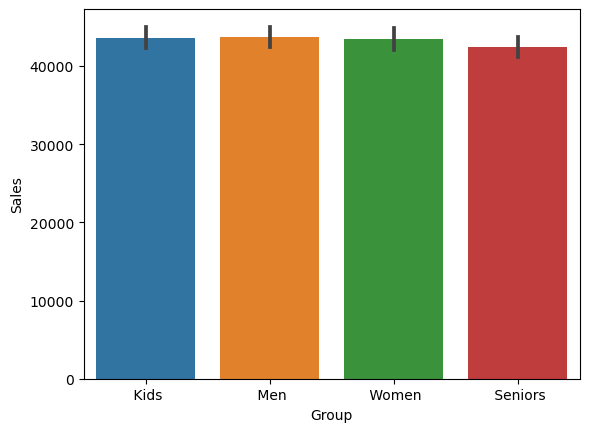

In [8]:
sns.barplot(x='Group', y='Sales', data=df)
plt.show()

### Q2) Determine which state is generating the highest sales, and which state is generating the lowest sales-

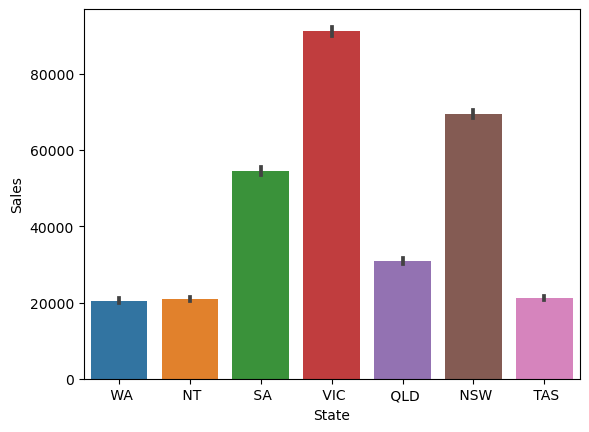

In [9]:
sns.barplot(x='State', y='Sales', data=df)
plt.show()

In [10]:
#Using Datetime to split Date into Year, Month & Day-->

df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df.drop(columns=['Date'], inplace=True)

### Q3) Generate weekly, monthly and quarterly reports for the analysis made-

In [11]:
#Generating the Monthly reports-->

df['Month'].value_counts()

10    2520
11    2520
12    2520
Name: Month, dtype: int64

In [12]:
df.groupby('Month')['Sales'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
Month,,
12,48808.927826,2397
10,45353.174603,2520
11,35985.119048,2520


In [13]:
#Generating the Weekly reports-->

df['Day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int64)

In [14]:
#Creating bins for 'Day' column to make a new 'Week' column-->

bins=[ 1, 8, 15, 22, 30]
labels=['week 1', 'week 2', 'week 3', 'week 4']
df['Week']=pd.cut(df['Day'], bins=bins, labels=labels, include_lowest=True)
df.head()

,Time,State,Group,Unit,Sales,Year,Month,Day,Week
0,Morning,WA,Kids,8,20000.0,2020,10,1,week 1
1,Morning,WA,Men,8,20000.0,2020,10,1,week 1
2,Morning,WA,Women,4,10000.0,2020,10,1,week 1
3,Morning,WA,Seniors,15,37500.0,2020,10,1,week 1
4,Afternoon,WA,Kids,3,7500.0,2020,10,1,week 1


In [15]:
df['Week'].value_counts()

week 1    2016
week 4    2016
week 2    1764
week 3    1764
Name: Week, dtype: int64

In [16]:
df.groupby('Week')['Sales'].agg(['mean','count']).sort_values(by='mean', ascending=False)

,mean,count
Week,,
week 2,43651.960784,1734
week 4,43335.439838,1978
week 3,43295.977011,1740
week 1,42933.249370,1985


In [17]:
#Generating the Quarterly reports-->

df.groupby('Year')['Sales'].agg(['mean','count'])

,mean,count
Year,,
2020,43292.65833,7437


In [18]:
df.describe()

,Unit,Sales,Year,Month,Day
count,7560.000000,7437.00000,7560.0,7560.000000,7560.000000
mean,18.005423,43292.65833,2020.0,11.000000,15.500000
std,12.901403,29565.25541,0.0,0.816551,8.656014
min,2.000000,5000.00000,2020.0,10.000000,1.000000
25%,8.000000,20000.00000,2020.0,10.000000,8.000000
50%,14.000000,35000.00000,2020.0,11.000000,15.500000
75%,26.000000,62500.00000,2020.0,12.000000,23.000000
max,65.000000,132500.00000,2020.0,12.000000,30.000000


# Data Visualization-->

### Q4) State-wise sales analysis for different groups (kids, women, men, and seniors)-

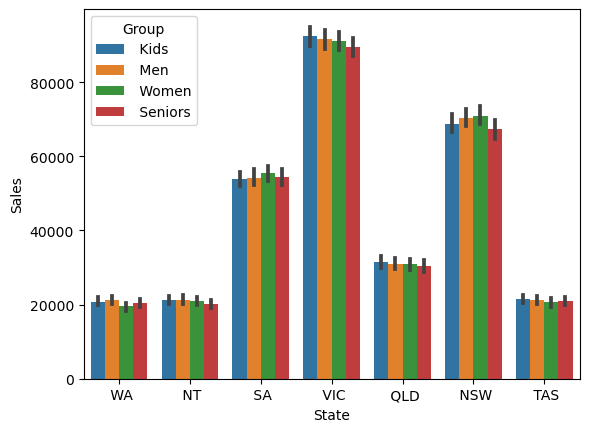

In [19]:
sns.barplot(x='State', y='Sales', data=df, hue='Group')
plt.show()

### Q5) Group-wise sales analysis (kids, women, men, and seniors) across different states-

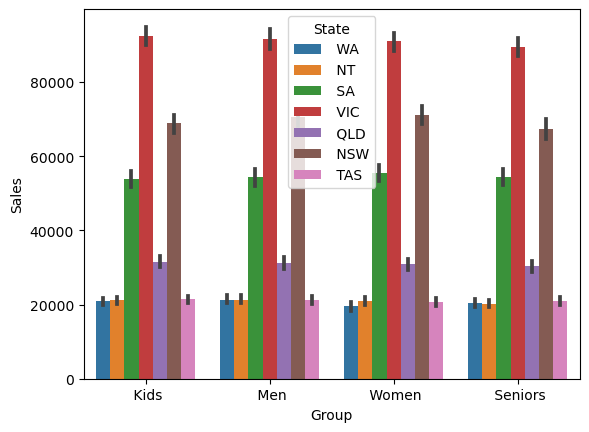

In [20]:
sns.barplot(x='Group', y='Sales', data=df, hue='State')
plt.show()

### Q6) Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest?  

In [21]:
df.head(2)

,Time,State,Group,Unit,Sales,Year,Month,Day,Week
0,Morning,WA,Kids,8,20000.0,2020,10,1,week 1
1,Morning,WA,Men,8,20000.0,2020,10,1,week 1


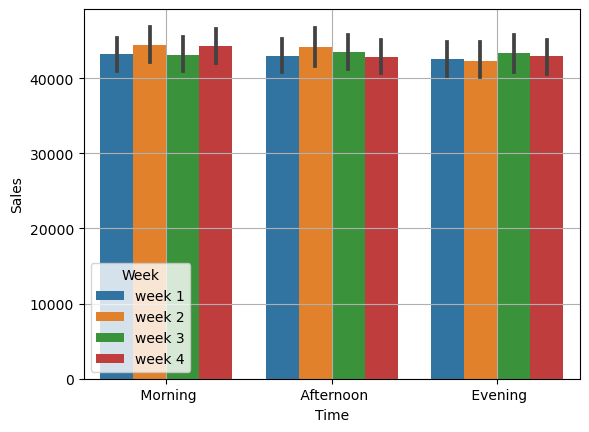

In [22]:
sns.barplot(x='Time', y='Sales', data=df, hue='Week')
plt.grid(True)
plt.show()

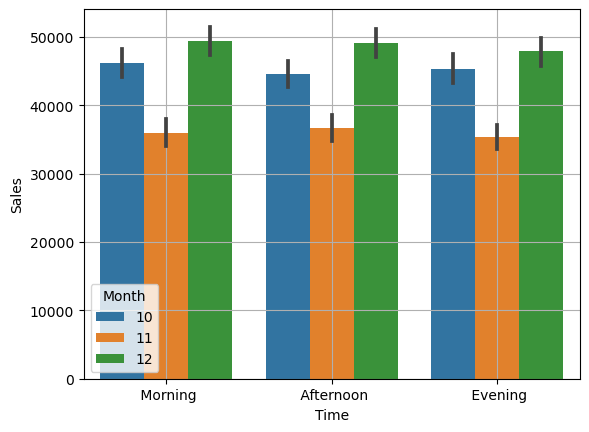

In [23]:
sns.barplot(x='Time', y='Sales', data=df, hue='Month')
plt.grid(True)
plt.show()

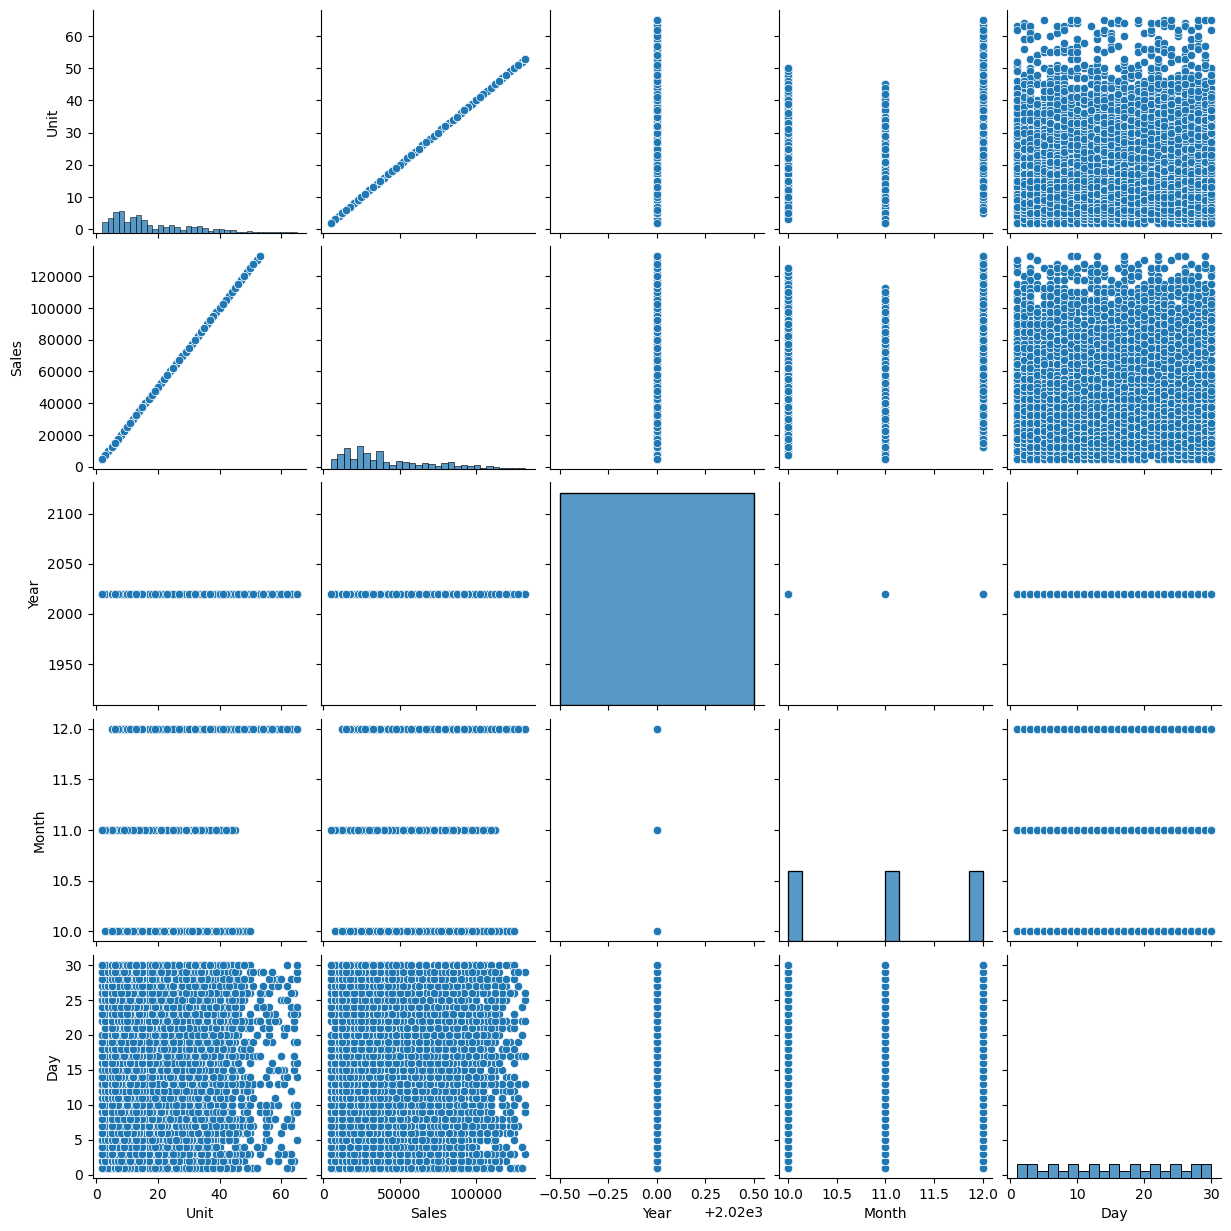

In [24]:
sns.pairplot(df)
plt.show()

# Report-->